In [93]:
import pickle
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from utils import denormalize, bounding_box, load_inputs

import json

In [94]:
def denormalize(T, coords):
    return 0.5 * ((coords + 1.0) * T)

In [95]:
g = open("./locations_extract.json")
glimpses = json.load(g)
g.close()

In [96]:
# glimpses.keys()

In [97]:
# im_name = '../../pooling/data/MEX/484014116/pngs/484014116_2010_1_box484014116_MAY.png'
# coords = glimpses[im_name]

In [98]:
import torchvision
import torch

def plot(image_name, coords):
    
    muni_id = image_name.split("/")[5]
    image = torchvision.transforms.functional.adjust_brightness(load_inputs(image_name), brightness_factor = 2)    
    
    first = True
    for glimpseID, coords in coords.items():
        from_x, to_x, from_y, to_y = int(coords["from_x"]), int(coords["to_x"]), int(coords["from_y"]), int(coords["to_y"])
        if first:
            all_coords = torch.tensor([[from_x, from_y]])
            cur_patch = image[:, :, from_x:to_x, from_y:to_y]
            size = cur_patch.shape[2]
        else:
            all_coords = torch.cat((all_coords, torch.tensor([[from_x, from_y]])), dim = 0)
        first = False
        
    coords = all_coords.numpy()
    print(coords)
    num_anims = len(coords)
    num_cols = 1
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.imshow(image[0].permute(1,2,0), cmap="Greys_r")

    def updateData(i):
        color = "r"
        c = coords[i]
        for p in ax.patches:
            p.remove()
        rect = bounding_box(c[0], c[1], size, color)
        ax.add_patch(rect)  
     
    # animate
    anim = animation.FuncAnimation(
        fig, updateData, frames = num_anims, interval=500, repeat=True
    )   
    
    # save as mp4
    name = f"./animations/{muni_id}.mp4"
    anim.save(name, extra_args=["-vcodec", "h264", "-pix_fmt", "yuv420p"])        

[[767 150]
 [767 338]
 [544   0]
 [767   0]]
[[1056  205]
 [1056    0]
 [1056  227]
 [1056  306]]
[[2243    0]
 [2243  385]
 [2243  535]
 [2243  157]]
[[815 261]
 [874   0]
 [874 314]
 [874   9]]
[[763   0]
 [689   0]
 [763 254]
 [464 312]]
[[1089    0]
 [1089    0]
 [1089    0]
 [1089    0]]


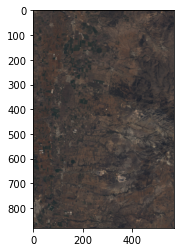

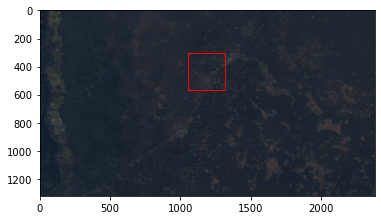

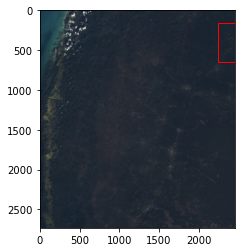

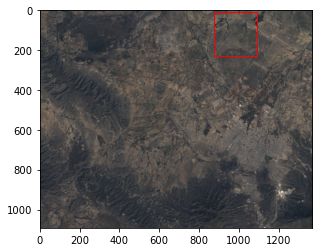

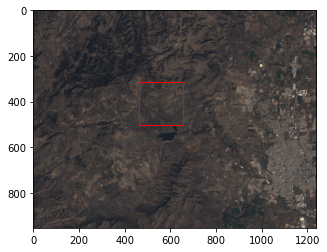

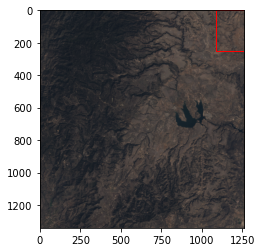

In [99]:
i = 0
for k,v in glimpses.items():
    plot(k, v)
    i += 1
    if i > 5:
        break